In [ ]:
#first assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(r,x0,x0_hat,n):
    xn = [x0]
    xn_hat = [x0_hat]
    for i in range(0,n):
        xn.append(r*xn[i]*(1-xn[i]))
        xn_hat.append(r*xn_hat[i]*(1-xn_hat[i]))
    return np.absolute(np.array(xn)-np.array(xn_hat))

n = np.arange(0.0, 201, 1)
#print(f(2,0.2,0.200001,201))
plt.figure(1)
plt.subplot(311)
plt.plot(n, f(2,0.2,0.200001,200))

plt.subplot(312)
plt.plot(n, f(3.4,0.2,0.200001,200))

plt.subplot(313)
plt.plot(n, f(3.7,0.2,0.200001,200))
plt.show()

print(sum(f(3.72,0.2,0.200001,5000))/5000)    

In [ ]:
#second assignment

In [ ]:
%run my_app.py --map_params 0.2 2 3.9 0.001 200 5

In [ ]:
#third assignment

In [ ]:
def deltaUpdate(coeffArray):
    return (coeffArray[1]-coeffArray[0])/(coeffArray[2]-coeffArray[1])

def nextCoeff(coeffArray, delta):
    return coeffArray[2] + ((coeffArray[2]-coeffArray[1])/delta)

In [ ]:
b1 = 3
b2 = 3.4494897
b3 = 3.5440903
delta = 4.7514
coeffArray = [b1,b2,b3]
b4 = nextCoeff(coeffArray, delta)
print(b4)
n = 10
for i in range(n):
    delta = deltaUpdate(coeffArray)
    

In [ ]:
b4 = 3.5440903 + ((3.5440903-3.4494897)/4.7514)
print(b4)

In [ ]:
#fifth assignment

In [ ]:
def forwardEuler(n, x0, v0, deltaT, k, m):
    x = np.zeros(n+1)
    v = np.zeros(n+1)
    x[0] = x0
    v[0] = v0
    for i in range(1,n+1):
        [x[i], v[i]] = [x[i-1] + deltaT*(v[i-1]), v[i-1] + deltaT*((-k/m)*x[i-1])]
    return [x,v]

def backwardEuler(n, x0, v0, deltaT, k, m):
    x = np.zeros(n+1)
    v = np.zeros(n+1)
    x[0] = x0
    v[0] = v0
    for i in range(1,n+1):
        [xfe, vfe] = forwardEuler(1, x[i-1], v[i-1], deltaT, k, m)
        [x[i], v[i]] = [x[i-1] + deltaT*vfe[1], v[i-1] + deltaT*((-k/m)*xfe[1])]
    return [x,v]

In [ ]:
# Unit test
#print(x,v)
n = 5
x0 = -1
v0 = -2
deltaT = 0.1
k = 2
m = 0.5

[xfe, vfe] = forwardEuler(n, x0, v0, deltaT, k, m)
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(xfe,vfe)
plt.title("SHO State Space")
plt.xlabel("x", fontsize="18")
plt.ylabel("v", fontsize="16")
plt.tight_layout()
plt.show()
print(xfe[-1],vfe[-1])

[xbe, vbe] = backwardEuler(n, x0, v0, deltaT, k, m)
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(xbe,vbe)
plt.title("SHO State Space")
plt.xlabel("x", fontsize="18")
plt.ylabel("v", fontsize="16")
plt.tight_layout()
plt.show()
print(xbe[-1], vbe[-1])

In [ ]:
#sixth assignment

In [ ]:
def trapezoidal(n, x0, v0, deltaT, k, m):
    x = np.zeros(n+1)
    v = np.zeros(n+1)
    x[0] = x0
    v[0] = v0
    for i in range(1,n+1):
        [xfe, vfe] = forwardEuler(1, x[i-1], v[i-1], deltaT, k, m)
        [x[i], v[i]] = [x[i-1] + (deltaT/2)*(v[i-1] + vfe[1]), v[i-1] + (deltaT/2)*((-k/m)*(x[i-1] + xfe[1]))] 
    return [x,v]
    

In [ ]:
# Unit test

In [ ]:
n = 10
x0 = -1
v0 = -2
deltaT = 0.05
k = 2
m = 0.5

[xtp, vtp] = trapezoidal(n, x0, v0, deltaT, k, m)
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(xtp,vtp)
plt.title("SHO State Space")
plt.xlabel("x", fontsize="18")
plt.ylabel("v", fontsize="16")
plt.tight_layout()
plt.show()
print(xtp[-1],vtp[-1])

In [ ]:
# seventh assignment

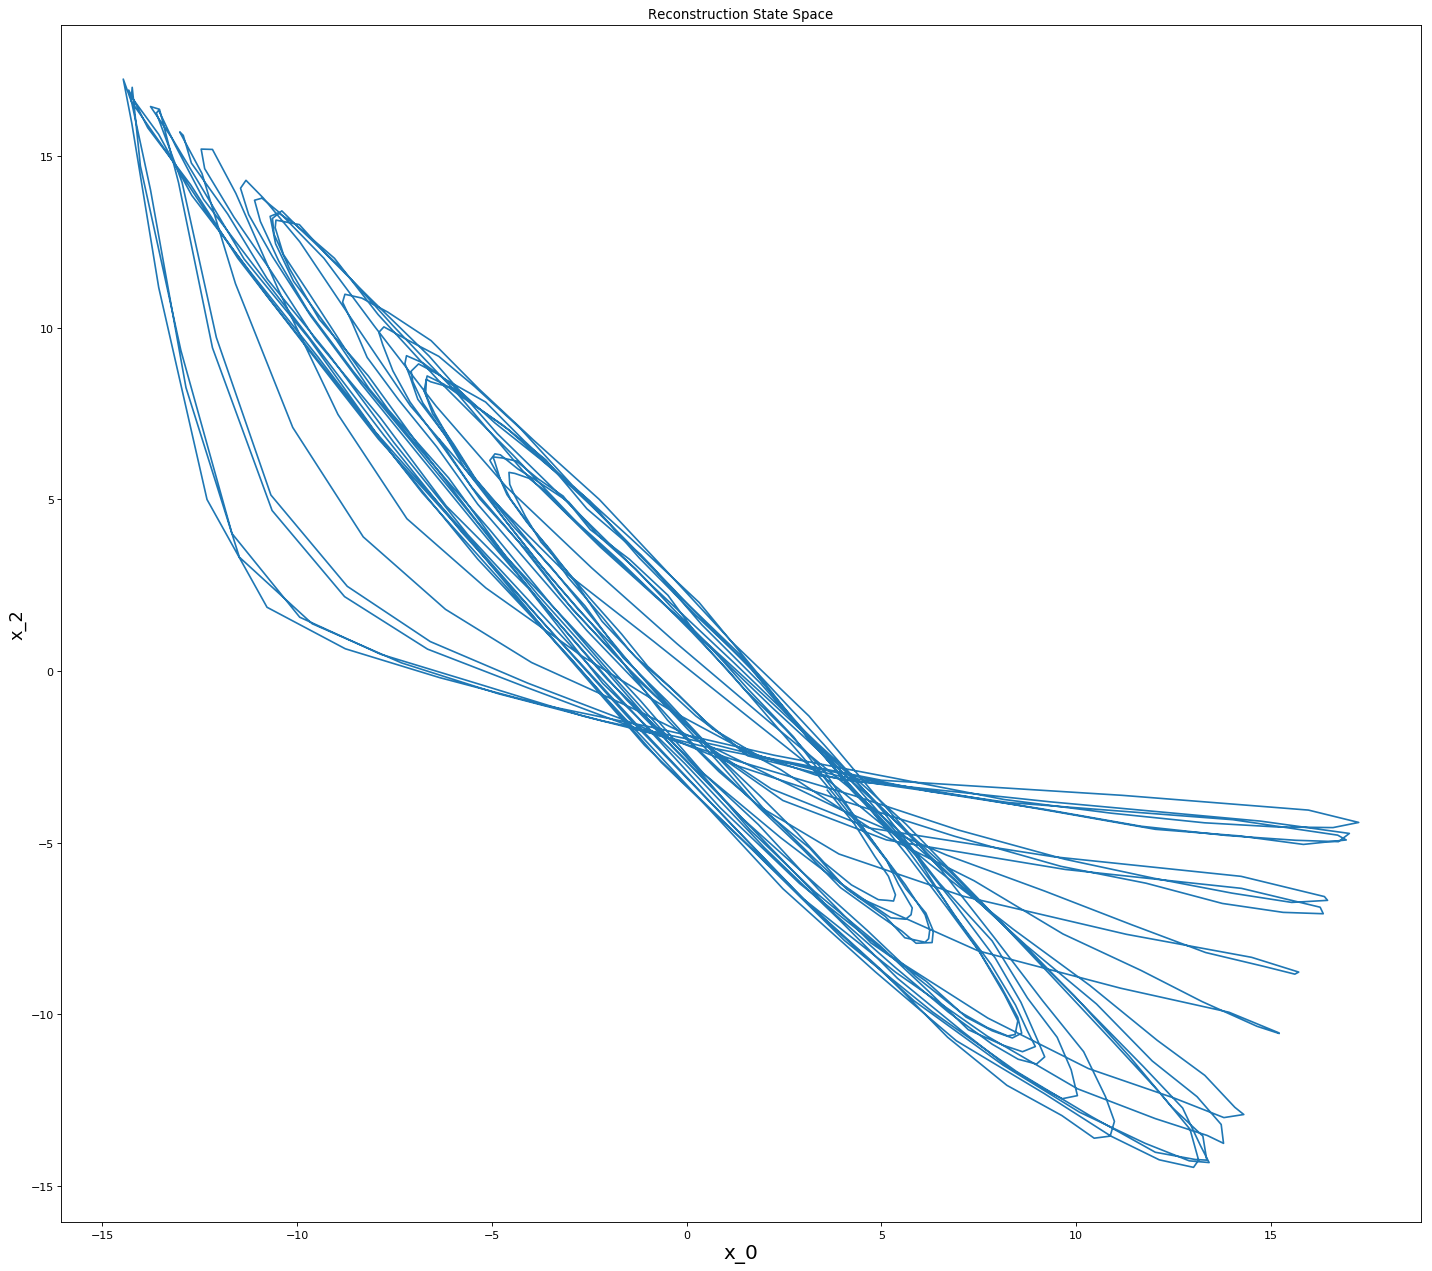

In [34]:
%run delayed_coordinate_embedding.py --map_params 8 7

In [1]:
#eighth assignment

4345.0


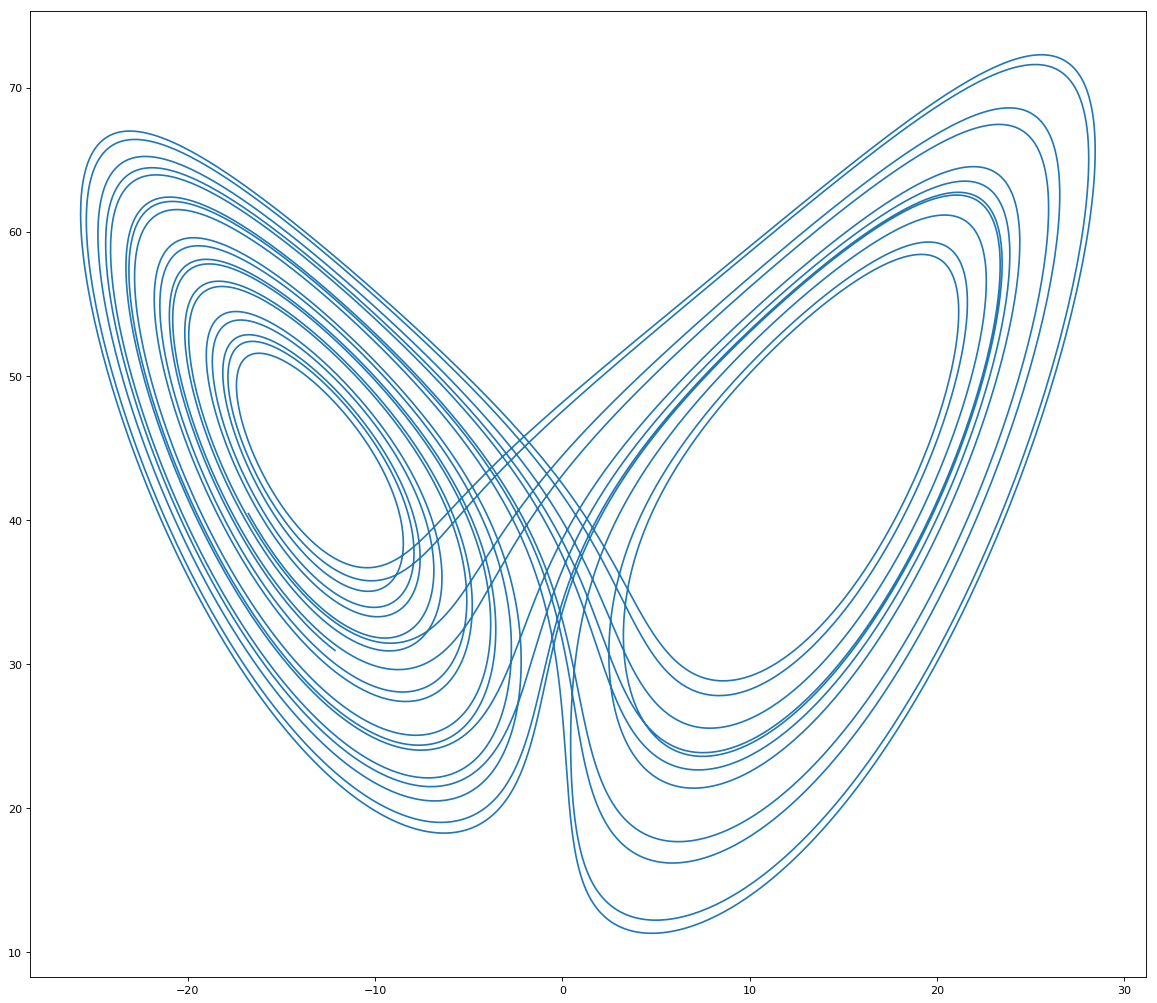

In [77]:
amplitudeArray = np.loadtxt('CapDimData.dat', delimiter=',', usecols=range(3))
amplitudeArray = np.delete(amplitudeArray,1,1)
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(amplitudeArray[:,0],amplitudeArray[:,1])

eps = 0.5
[minx, minz] = np.amin(amplitudeArray, axis=0)
[maxx, maxz] = np.amax(amplitudeArray, axis=0)
n = len(amplitudeArray[:,0])
epsMat = np.zeros( (int(np.ceil((maxx-minx)/eps))+1, int(np.ceil((maxz-minz)/eps))+1)  )
#create a map that takes the x-coordinate to an index in the matrix
#create a map that takes the z-coordinate to an index in the matrix
for i in range(n):
# 1. xcurr -> ceiling[(xcurr-minx)/eps]
     xcurr = int(np.ceil((amplitudeArray[i,0]-minx)/eps))
# 2. repeat for z-coordinate
     zcurr = int(np.ceil((amplitudeArray[i,1]-minz)/eps))
# 3. store value in matrix and set equal to 1
     epsMat[xcurr, zcurr] = 1
# 4. repeat for all coordinates
# 5. take the frobenius norm of the matrix
Neps = np.sum(epsMat)
print(Neps)

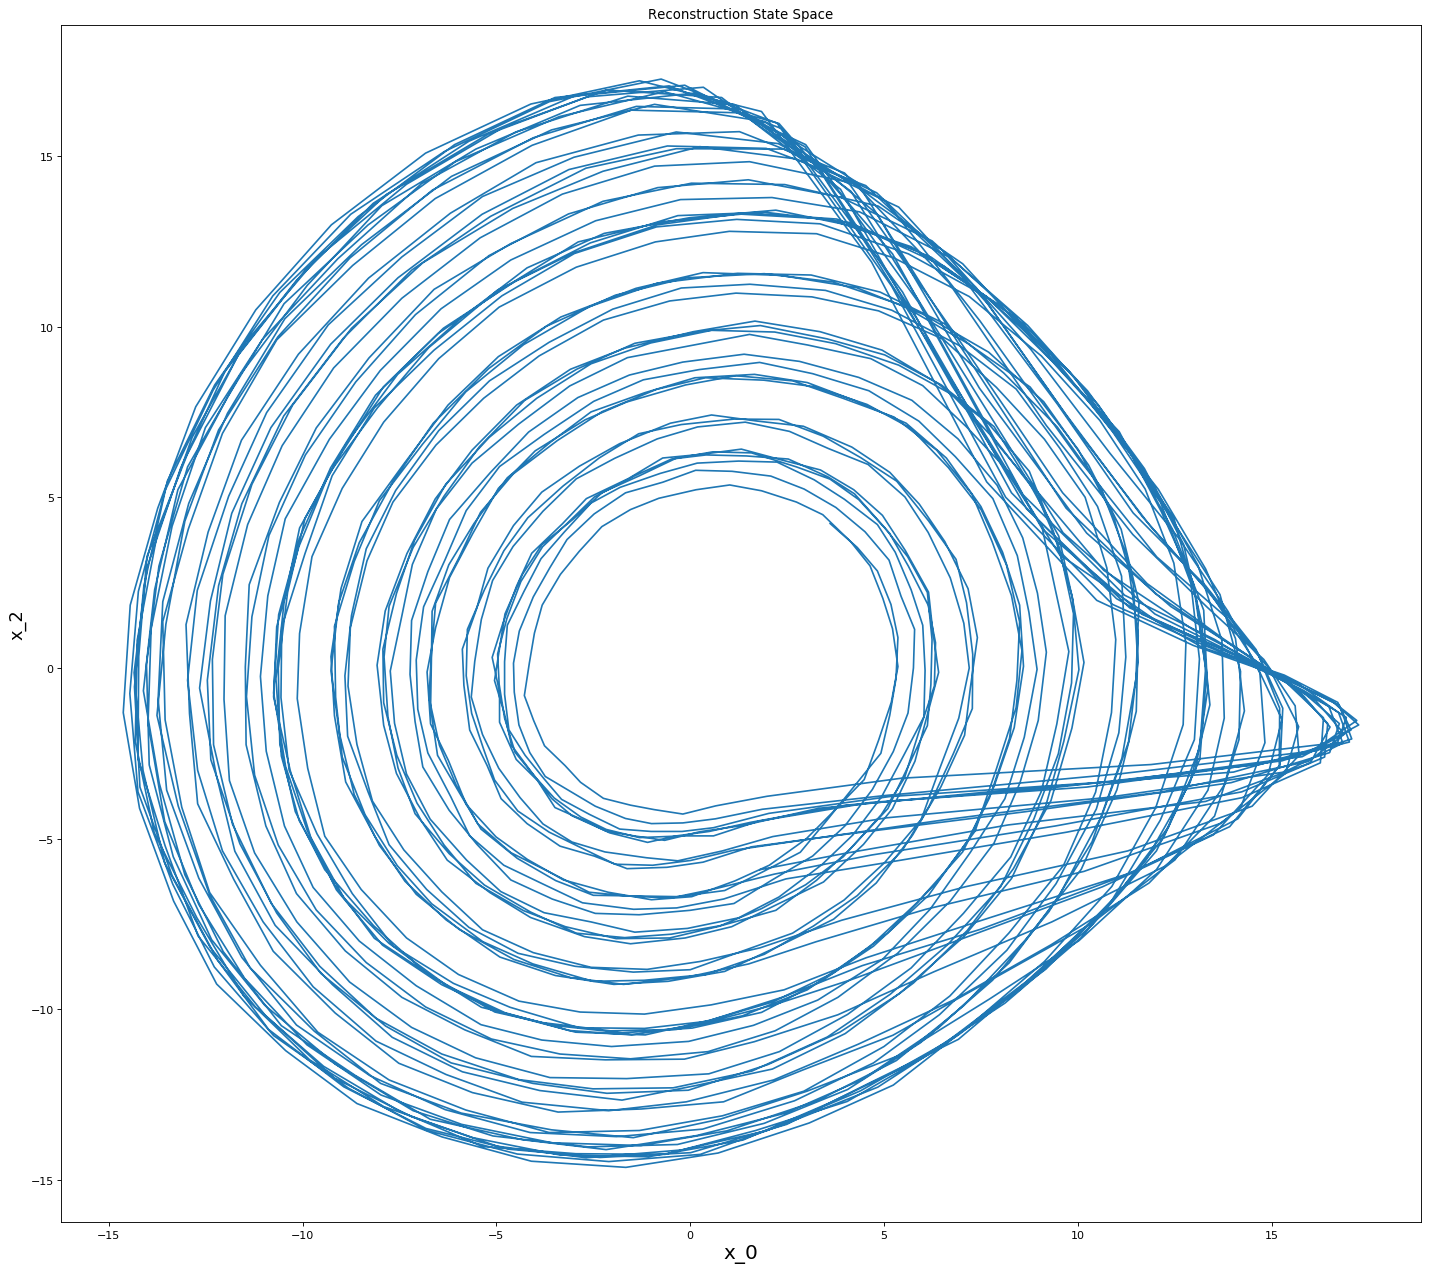

706.0


In [78]:
%run delayed_coordinate_embedding.py --map_params 8 3